# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will analyze the dataset from The Movie Database (TMDb). This dataset contains more than 10,000 different films with details for each of them. I am interested in finding properties associated with high revenues movies.  Besides that, I also want to know whether the director of the film impacts the movie's revenue or not. To start the journey, I chose revenue as my dependent variable. Let's begin the analysis!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Observations:**
1. Some columns (homepage, tagline, keywords, production_companies) have a lot of missing data (>= 10% of the total entries), and it is not good for our analysis. Therefore I will drop them. 
2. Each film has a unique id; however, there are ten films without imdb_id. I guess there are duplicated films in the data.
3. release_date and release_year are redundant. I prefer to keep release_year since it will be more helpful and it is more general

In [5]:
df[df.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


**Observation:**
1. Since there is one duplicated information in the data, I will drop one of them

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

**Observations:**
1. Some movies have the same original title
2. There are 5067 directors, which mean some directors have created more than one movie

**Conclusion:**
1. After a more in-depth look at the data, I decided to use revenue as my dependent variable and keep popularity, budget, original_title, director, runtime, genres, and release_year columns to be analyzed.
2. id, imdb_id, cast, homepage, tagline, keywords, overview, production_companies, release_date, vote_count, vote_average, budget_adj, and revenue_adj columns will be deleted because of some reasons that I already specified earlier.
3. The duplicated film will be deleted.

### Data Cleaning

**1. Do conclusion #1 and #2**

In [8]:
df.drop(['id','imdb_id','cast','homepage','tagline','keywords','overview','production_companies','release_date','vote_count','vote_average','budget_adj','revenue_adj'], axis = 1, inplace = True)

In [9]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015


**2. Do conlusion #3**

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,popularity,budget,revenue,runtime,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [13]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   director        10821 non-null  object 
 5   runtime         10865 non-null  int64  
 6   genres          10842 non-null  object 
 7   release_year    10865 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 763.9+ KB


In [15]:
sum(df['director'].isnull())

44

**Observation:**
1. Missing data = 44/10865*100 = 0.4%. Since the missing data is small; I decided to delete it

In [16]:
df = df[df['director'].isnull() == False]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10821 non-null  float64
 1   budget          10821 non-null  int64  
 2   revenue         10821 non-null  int64  
 3   original_title  10821 non-null  object 
 4   director        10821 non-null  object 
 5   runtime         10821 non-null  int64  
 6   genres          10800 non-null  object 
 7   release_year    10821 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 760.9+ KB


In [18]:
sum(df['genres'].isnull())

21

**Observation:**
1. Missing data = 21/10821*100 = 0.19%. Since the missing data is small; I decided to delete it

In [19]:
df = df[df['genres'].isnull() == False]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10800 non-null  float64
 1   budget          10800 non-null  int64  
 2   revenue         10800 non-null  int64  
 3   original_title  10800 non-null  object 
 4   director        10800 non-null  object 
 5   runtime         10800 non-null  int64  
 6   genres          10800 non-null  object 
 7   release_year    10800 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 759.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question #1: Which genres are most popular from year to year?

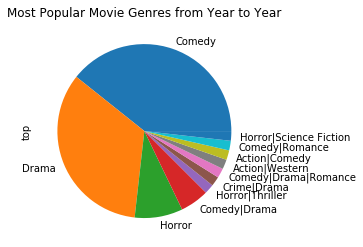

In [21]:
df_new = pd.DataFrame(df.groupby(['release_year'])['genres'].describe())
df_new['top'].value_counts().plot(kind='pie');
plt.title('Most Popular Movie Genres from Year to Year');

In [22]:
df_new['top'].value_counts()

Comedy                    22
Drama                     19
Horror                     5
Comedy|Drama               3
Horror|Thriller            1
Crime|Drama                1
Comedy|Drama|Romance       1
Action|Western             1
Action|Comedy              1
Comedy|Romance             1
Horror|Science Fiction     1
Name: top, dtype: int64

In [23]:
df_new.tail(10)

,count,unique,top,freq
release_year,,,,
2006,408,204,Drama,31
2007,435,224,Comedy,34
2008,488,230,Drama,33
2009,528,258,Comedy,43
2010,479,240,Drama,37
2011,539,262,Drama,34
2012,581,247,Drama,58
2013,652,243,Drama,59
2014,694,272,Drama,72


**Conclusion:**
The pie chart shows that Comedy is the best movie genre. After analyzing movie data from 1960 to 2015, "comedy" became the top genre for 23 years. It indicates that almost 24% of the time, many movies were created with a comedy theme.  As an example, in 2009, from 539 movies, 43 of them are comedy films. However, from 2010 until 2015, "drama" was the most popular genre and became the second most popular genre for the given timeline.

### Research Question #2: What kinds of properties are associated with movies that have high revenues?

correlation : (0.7347125084096334, 0.0)


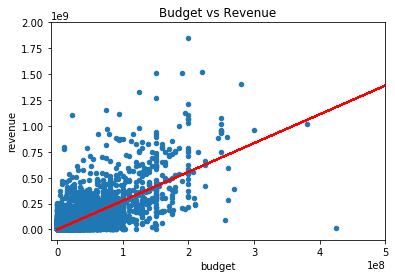

In [24]:
model = sm.OLS(df.revenue, sm.add_constant(df.budget))
p = model.fit().params
x = df.revenue
ax = df.plot(x = 'budget', y = 'revenue', kind = 'scatter')
ax.plot(x, p.const + p.budget*x, color='r')
ax.set_xlim([-10000000,500000000])
ax.set_ylim([-100000000,2000000000])
ax.set_title('Budget vs Revenue')
print("correlation :" ,scipy.stats.pearsonr(df.budget, df.revenue))

correlation : (0.6630954377661437, 0.0)


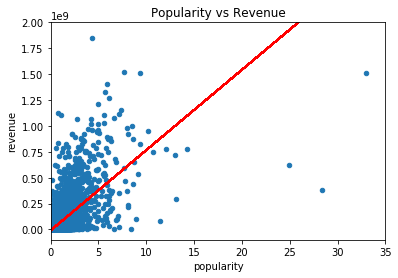

In [25]:
model = sm.OLS(df.revenue, sm.add_constant(df.popularity))
p = model.fit().params
x = df.revenue
ax = df.plot(x = 'popularity', y = 'revenue', kind = 'scatter')
ax.plot(x, p.const + p.popularity*x, color='r')
ax.set_xlim([0,35])
ax.set_ylim([-100000000,2000000000])
ax.set_title('Popularity vs Revenue')
print("correlation :" ,scipy.stats.pearsonr(df.popularity, df.revenue))

correlation : (0.1652308317309494, 5.767045864010186e-67)


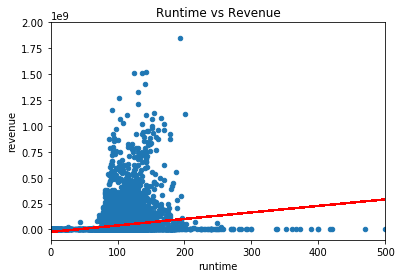

In [26]:
model = sm.OLS(df.revenue, sm.add_constant(df.runtime))
p = model.fit().params
x = df.revenue
ax = df.plot(x = 'runtime', y = 'revenue', kind = 'scatter')
ax.plot(x, p.const + p.runtime*x, color='r')
ax.set_xlim([0,500])
ax.set_ylim([-100000000,2000000000])
ax.set_title('Runtime vs Revenue')
print("correlation :" ,scipy.stats.pearsonr(df.runtime, df.revenue))

correlation : (0.05809008272419697, 1.5287617091909408e-09)


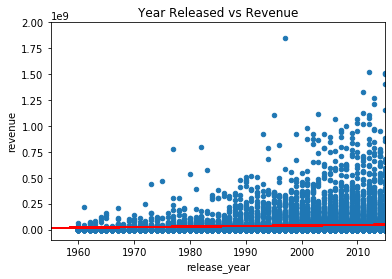

In [27]:
model = sm.OLS(df.revenue, sm.add_constant(df.release_year))
p = model.fit().params
x = df.revenue
ax = df.plot(x = 'release_year', y = 'revenue', kind = 'scatter')
ax.plot(x, p.const + p.release_year*x, color='red')
ax.set_xlim([1955,2015])
ax.set_ylim([-100000000,2000000000])
ax.set_title('Year Released vs Revenue')
print("correlation :" ,scipy.stats.pearsonr(df.release_year, df.revenue))

**Conclusion:**
From my observation in the four plots and correlation coefficient between independent and dependent variables, I can conclude that popularity, budget, runtime, and release_year is positively correlated to the revenue. However, among those four variables, popularity and budget show stronger evidence that both are top properties of high revenue movies. This fact shows that when the film has a higher budget or the movie has higher popularity, and it will most likely have high revenue.

### Research Question #3: Is there a difference in movie revenues guided by directors with one or more experience?

In [28]:
directMoreThanOne = df[df['director'].duplicated() == True]
directOnlyOne = df[df['director'].duplicated() == False]

In [29]:
directMoreThanOne.shape

(5744, 8)

In [30]:
directOnlyOne.shape

(5056, 8)

,revenue
count,5.744000e+03
mean,5.303074e+07
std,1.240662e+08
min,0.000000e+00
25%,0.000000e+00
50%,2.042312e+06
75%,4.914308e+07
max,1.845034e+09


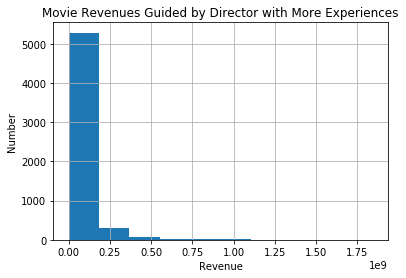

In [31]:
ax = directMoreThanOne['revenue'].hist()
ax.set_ylabel('Number')
ax.set_xlabel('Revenue')
ax.set_title('Movie Revenues Guided by Director with More Experiences')
pd.DataFrame(directMoreThanOne['revenue'].describe())

In [32]:
directMoreThanOne['revenue'].mean()

53030742.68454039

,revenue
count,5.056000e+03
mean,2.533616e+07
std,1.072766e+08
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.362001e+06
max,2.781506e+09


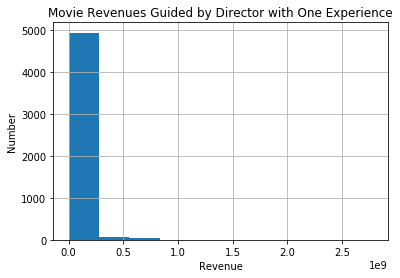

In [33]:
ax = directOnlyOne['revenue'].hist()
ax.set_ylabel('Number')
ax.set_xlabel('Revenue')
ax.set_title('Movie Revenues Guided by Director with One Experience')
pd.DataFrame(directOnlyOne['revenue'].describe())

In [34]:
directOnlyOne['revenue'].mean()

25336162.95391614

**Conclusion:**
Both histograms show that movies guided by a director with one experience most likely have a low revenue. On the other hand, movies directed by a more experienced director have more revenue. This Conclusion also supported by the mean revenue of movies directed by a director with more than one experience is much higher than only one experience. The mean difference is 53030742.68 - 25336162.95 = 27694579.73. Therefore, I can conclude that a professional director's movies will have a bigger chance of getting high revenue. 